# Programación en entornos BigData. Segunda entrega.
* En todos los gráficos se valorará que se pueda entender fácilmente la información mostrada. Incluye la utilización de etiquetas, leyendas, títulos, escalas apropiadas...
* También se valorará la calidad del código, incluyendo comentarios, y del resto del notebook.
* La entrega se realiza a través del aula virtual, completando este notebook en Jupyter. Hay que guardarlo con el nombre Entrega2_[nombre]_[apellidos].ipynb
* Por favor, no edites los enunciados.
* Calificación:
**    Ejercicio 1: 3 puntos, 1 por cada apartado.
**    Ejercicio 2: 2 puntos.
**    Ejercicio 3: 2.5 puntos.
**    Ejercicio 4: 2.5 puntos.


Celda para imports

In [145]:
# 05/12/2024
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib qt
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

## Carga de datos

In [146]:
## no edites ni elimines esta celda !!!
# path = "../datos/"
# hr = pd.read_csv(path + "/HR_Analytics.csv", sep = ",")
# seguros  = pd.read_csv(path + "/seguros.csv", sep = ",")

Hay que cargar:
* los datos de recursos humanos (HR_Analytics.csv) en un dataframe llamado hr.
* los datos de seguros (insurance.csv) en un dataframe llamado seguros.


Edita la siguiente celda para que se ajuste a tus rutas.

In [147]:
# google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
hr = pd.read_csv(path + "/HR_Analytics.csv", sep = ",")
seguros  = pd.read_csv(path + "/insurance.csv", sep = ",")

In [149]:
hr.head(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [150]:
hr.columns.unique()

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [151]:
seguros.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Ejercicio 1
Utilizando Seaborn, para el fichero HR_Analytics.csv:


a) Muestra un gráfico con el histograma del salario mensual según el campo de educación (EducationField). Como hay 6 valores posibles, el gráfico tendrá 6 subplots, en dos filas y tres columnas. (1 punto)



In [152]:
hr.EducationField.unique()

array(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree',
       'Other', 'Human Resources'], dtype=object)

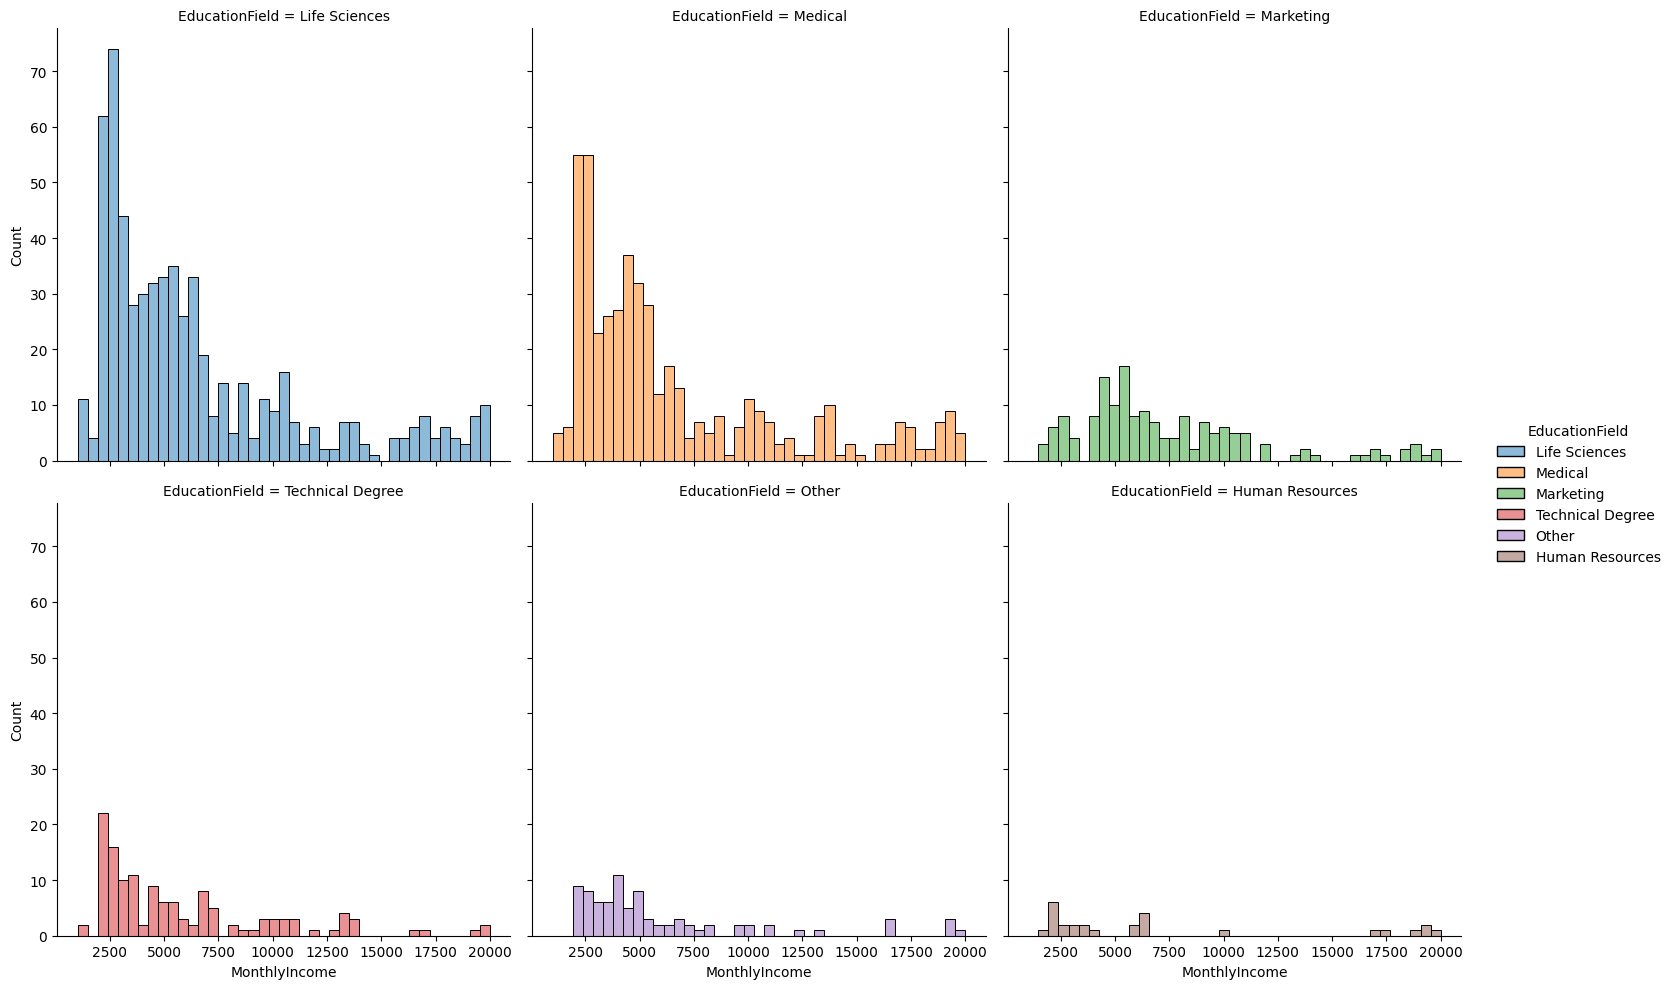

In [153]:
sns.displot(
    data=hr,
    x="MonthlyIncome",
    hue="EducationField", # Diferencia con colores
    col="EducationField",
    col_wrap=3,
    kind="hist",
    bins=41
)

b) Muestra un gráfico como el anterior, pero con dos histogramas en cada subplot, para hombres y mujeres, de dos colores diferentes.  (1 punto)

In [154]:
hr.Gender.unique()

array(['Male', 'Female'], dtype=object)

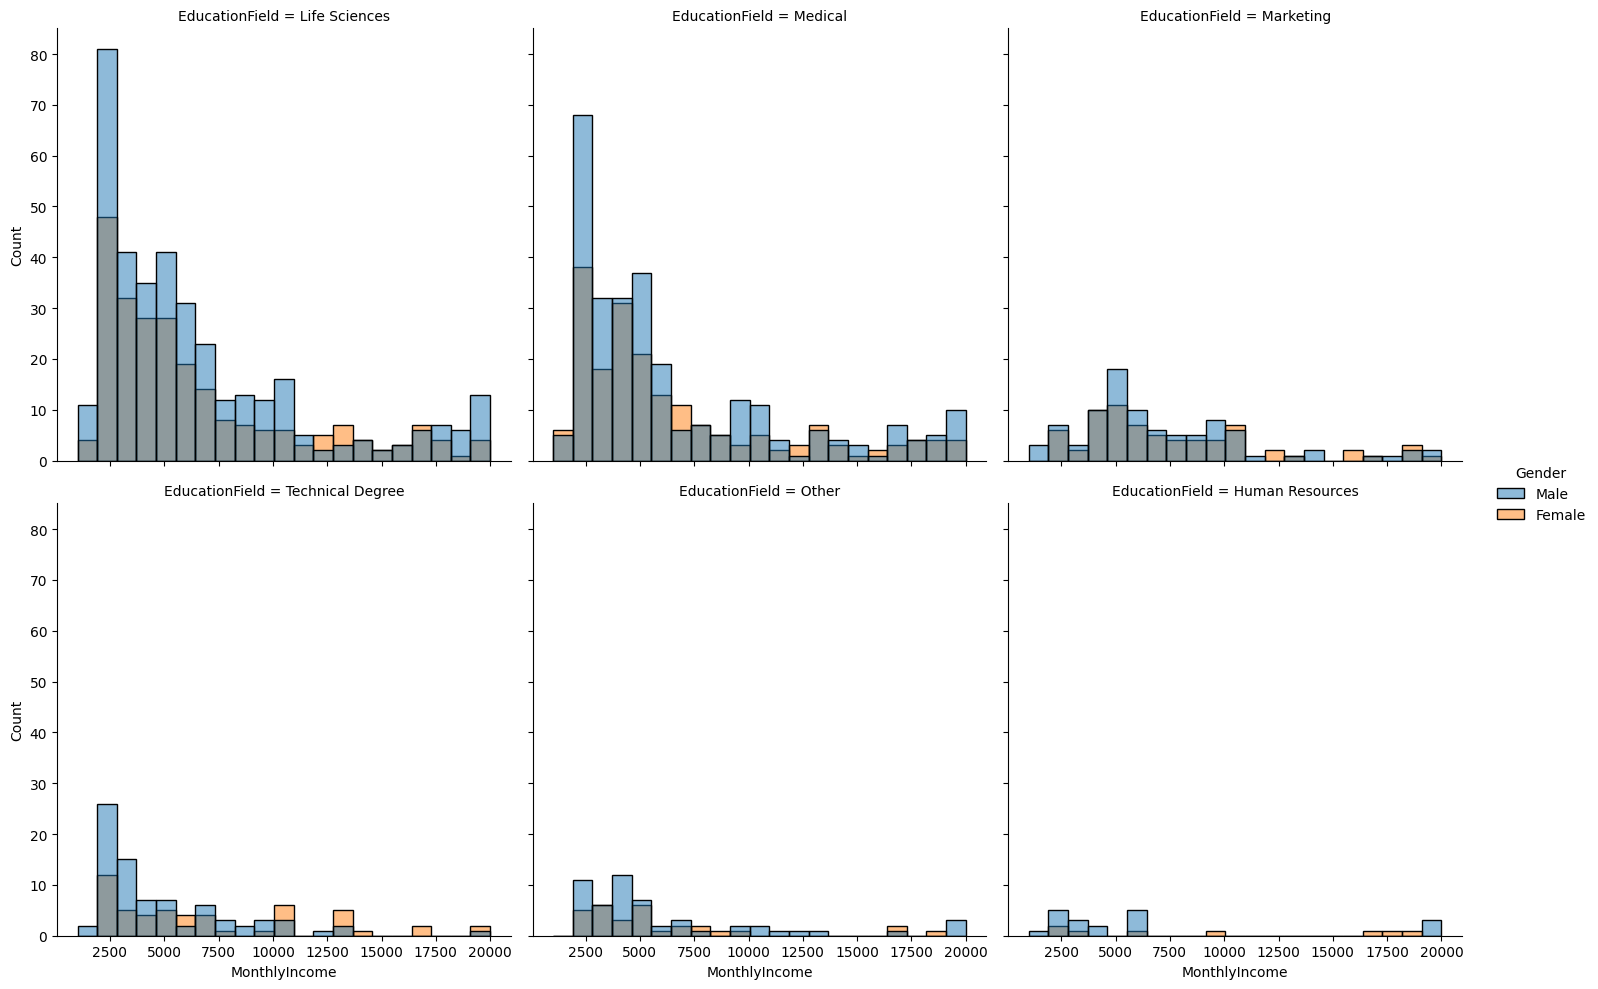

In [155]:
sns.displot(
    data=hr,
    x="MonthlyIncome",
    hue="Gender",           # Diferencia con colores
    col="EducationField",
    col_wrap=3,
    kind="hist",
    bins=21,

    # Los histogramas no se superponen usando dodge pero me parece que es mas facil de ver cuando se superponen:
    # multiple="dodge"
)

c) Muestra un gráfico como el anterior, pero usando un diagrama de violín. (1 punto)

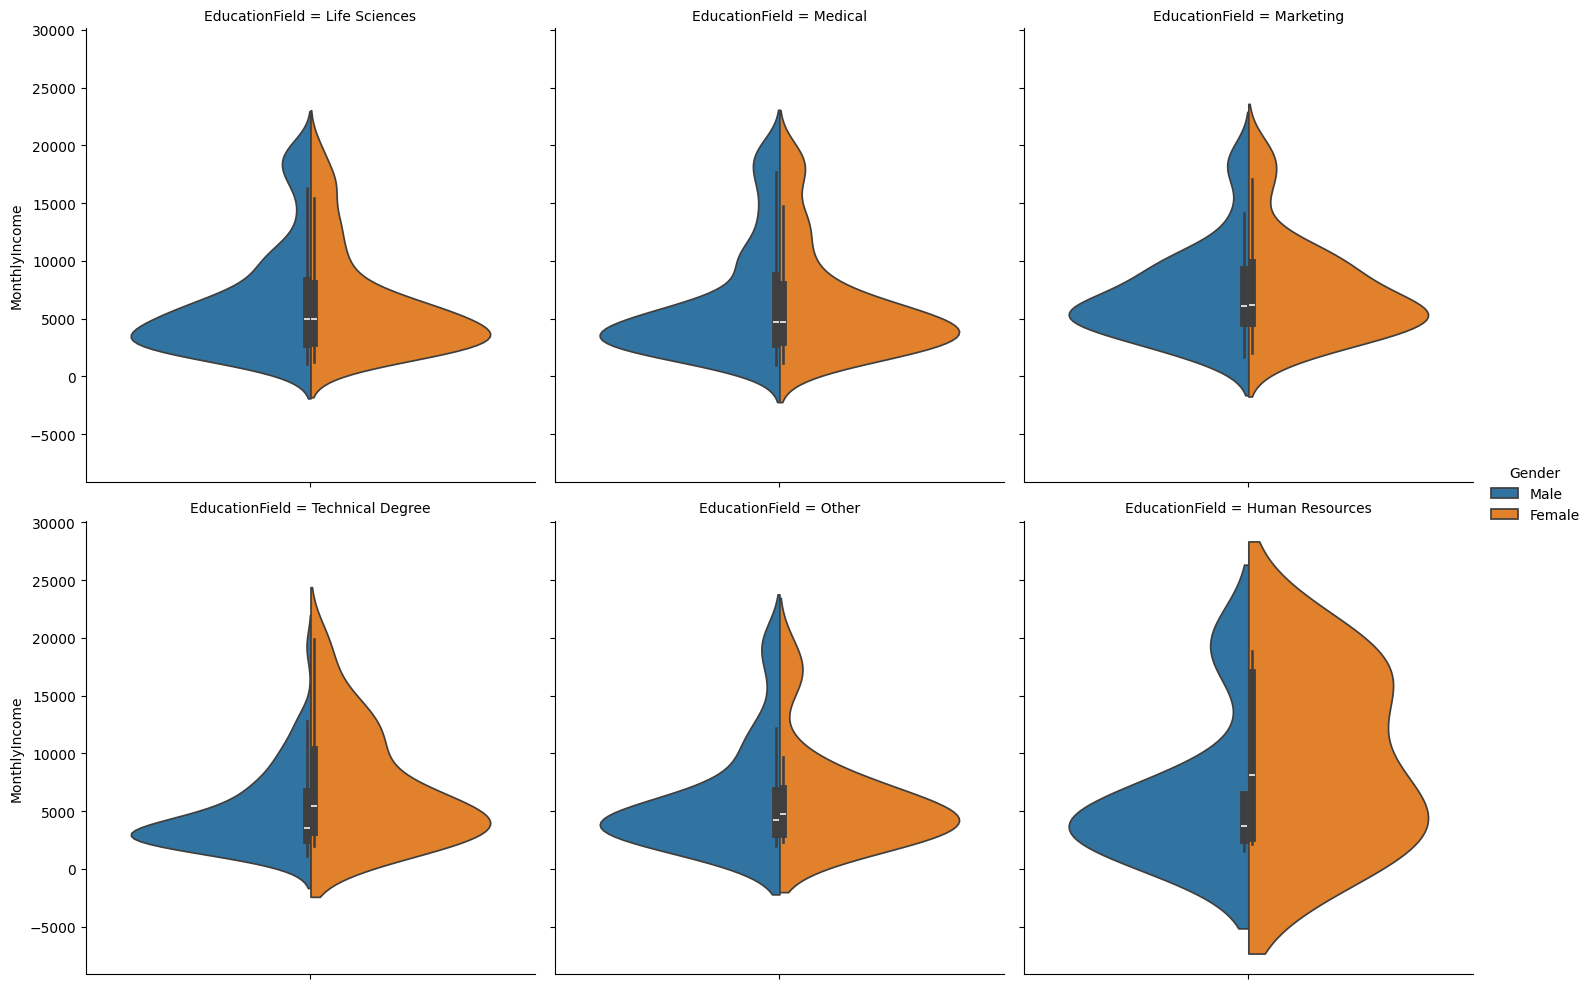

In [156]:
sns.catplot(
    data=hr,
    y="MonthlyIncome",    # Variable eje Y
    hue="Gender",         # Diferencia por colores según el género
    kind="violin",        # Especifica: diagrama de violín
    split=True,           # Muestra ambas distribuciones (Gender) en un único violín (opcional)
    col="EducationField", # Divide por categoría de campo educativo
    col_wrap=3            # Organiza en filas de 3 gráficos
)


## Ejercicio 2

Utilizando Seaborn, para el fichero HR_Analytics.csv:
Muestra un gráfico con seis subplots, uno para cada campo de educación. Cada subplot será de tipo scatter, con la edad en el eje x y el salario mensual en el y.
Hay que diferenciar entre hombre y mujeres y mostrar rectas de regresión.
(2 puntos)

(Función recomendada: lmplot())

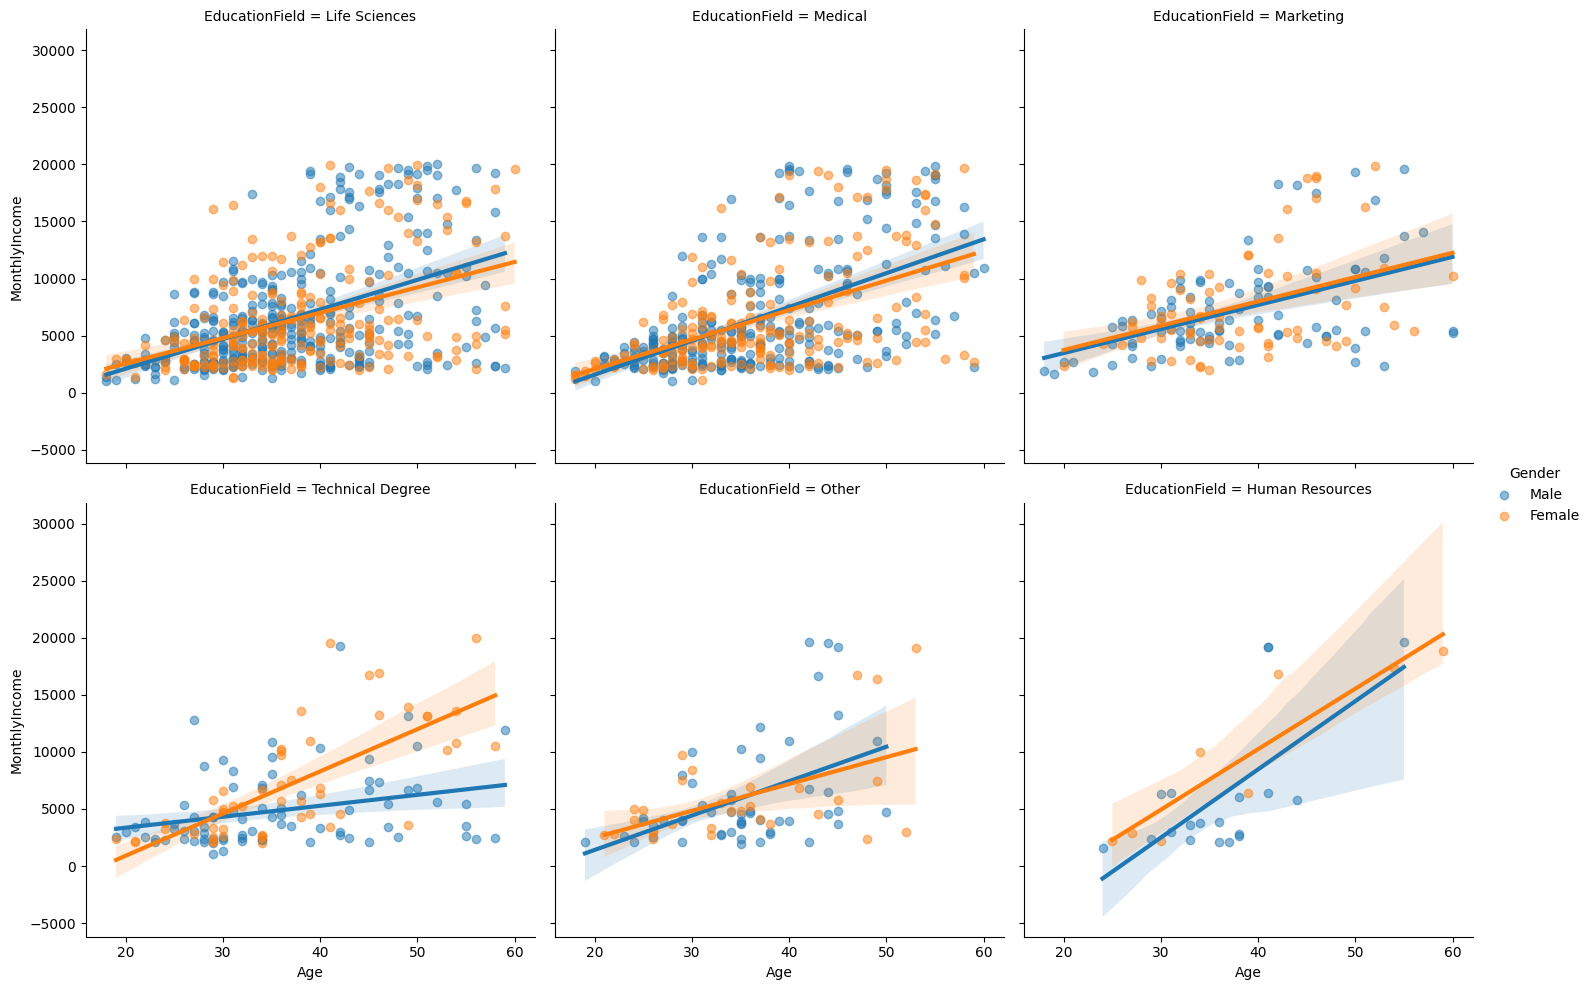

In [157]:
# DOCS: https://seaborn.pydata.org/generated/seaborn.lmplot.html
# sb011_pair_plot.ipynb

sns.lmplot(
    data=hr,
    x="Age",
    y="MonthlyIncome",
    hue="Gender",
    col="EducationField",
    col_wrap=3,
    scatter_kws={"alpha": 0.5}, # Transparencia para los puntos
    line_kws={"linewidth": 3}   # Grosor de la línea de regresión
)

## Ejercicio 3

 A partir de los datos de https://www.mambiente.madrid.es/opendata/horario.xml, crea un gráfico con un muestre los valores horarios recogidos por una estación para un contaminante. El gráfico tendrá un control para elegir el tipo de contaminante, la estación y el municipio pueden quedar fijados por el programa.
 (2.5 puntos)

 Información sobre el fichero:

 https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=41e01e007c9db410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default>

 NOTA: También se puede hacer usando el fichero .csv.

In [158]:
# Apuntes consultados
# sb006_Ex006_readXML.ipynb
# sb012_ipywidgets1.ipynb
# sb013_Ex004_altura_vs_edad.ipynb

# El tipo de contaminante es magnitud


# Lectura de datos:
url = 'https://www.mambiente.madrid.es/opendata/horario.xml'
calidad_aire_horario = pd.read_xml(url)
calidad_aire_horario.head()

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2024,12,5,3.0,V,...,3.0,V,0.0,N,0.0,N,0.0,N,0.0,N
1,28,79,4,6,28079004_6_48,2024,12,5,0.6,V,...,0.4,V,0.0,N,0.0,N,0.0,N,0.0,N
2,28,79,4,7,28079004_7_8,2024,12,5,68.0,V,...,10.0,V,0.0,N,0.0,N,0.0,N,0.0,N
3,28,79,4,8,28079004_8_8,2024,12,5,64.0,V,...,69.0,V,0.0,N,0.0,N,0.0,N,0.0,N
4,28,79,4,12,28079004_12_8,2024,12,5,168.0,V,...,84.0,V,0.0,N,0.0,N,0.0,N,0.0,N


In [159]:
calidad_aire_horario.municipio.unique()

array([79])

In [160]:
calidad_aire_horario.estacion.unique()

array([ 4,  8, 11, 16, 17, 18, 24, 27, 35, 36, 38, 39, 40, 47, 48, 49, 50,
       54, 55, 56, 57, 58, 59, 60])

In [161]:
calidad_aire_horario.magnitud.unique()

array([ 1,  6,  7,  8, 12,  9, 10, 14, 20, 30, 35])

In [162]:
# Establecer el municipio y la estación fijos:
municipio_fijo = 79
estacion_fija = 55

# Filtrar los datos del DataFrame:
datos_filtrados_mun_estacion = calidad_aire_horario[
    (calidad_aire_horario["municipio"] == municipio_fijo) &
    (calidad_aire_horario["estacion"] == estacion_fija)
]

# Visualizar:
datos_filtrados_mun_estacion.head()

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
98,28,79,55,7,28079055_7_8,2024,12,5,37.0,V,...,51.0,V,0.0,N,0.0,N,0.0,N,0.0,N
99,28,79,55,8,28079055_8_8,2024,12,5,41.0,V,...,43.0,V,0.0,N,0.0,N,0.0,N,0.0,N
100,28,79,55,10,28079055_10_47,2024,12,5,23.0,V,...,37.0,V,0.0,N,0.0,N,0.0,N,0.0,N
101,28,79,55,12,28079055_12_8,2024,12,5,99.0,V,...,120.0,V,0.0,N,0.0,N,0.0,N,0.0,N
102,28,79,55,20,28079055_20_59,2024,12,5,8.2,V,...,9.3,V,0.0,N,0.0,N,0.0,N,0.0,N


In [163]:
# FORMA 1: MANUAL
# Seleccionar columnas de horas (H01, H02, ..., H24) y validez (V01, V02, ..., V24)
horas = ["H01", "H02", "H03", "H04", "H05", "H06", "H07", "H08", "H09", "H10", "H11", "H12",
         "H13", "H14", "H15", "H16", "H17", "H18", "H19", "H20", "H21", "H22", "H23", "H24"]

validez = ["V01", "V02", "V03", "V04", "V05", "V06", "V07", "V08", "V09", "V10", "V11", "V12",
           "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24"]

# Mostrar las columnas seleccionadas
print("Columnas de horas:", horas)
print("Columnas de validez:", validez)

Columnas de horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Columnas de validez: ['V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24']


In [164]:
# FORMA 2: ZFILL + LIST COMPREHENSION

# string.zfill(width):
#   - string: string al que se le agregaran los 0's
#   - width: longitud deseada del string resultante (0's incluidos)

# Generar las columnas de horas (H01, H02, ..., H24)
horas = [f"H{str(i).zfill(2)}" for i in range(1, 25)]

# Generar las columnas de validez (V01, V02, ..., V24)
validez = [f"V{str(i).zfill(2)}" for i in range(1, 25)]

# Mostrar los resultados
print("Columnas de horas:", horas)
print("Columnas de validez:", validez)

Columnas de horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Columnas de validez: ['V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24']


In [165]:
# Pasamos H01, H02... y sus valores correspondientes de columnas a filas:
# df.melt(id_vars=None, value_vars=None, var_name=None, value_name=None)
#   - id_vars: Columnas que permanecen fijas.
#   - value_vars: Columnas que quieres convertir en filas. Si no lo defines, usa todas las columnas excepto las de id_vars.
#   - var_name: Nombre de la nueva columna que contendrá los nombres de las columnas originales.
#   - value_name: Nombre de la nueva columna que contendrá los valores de las columnas seleccionadas.


# Convertir las columnas de horas (H01, H02, ..., H24) a filas:
datos_horas = datos_filtrados_mun_estacion.melt(

    id_vars=["provincia", "municipio", "estacion", "magnitud", "ano", "mes", "dia"],

    value_vars=horas,  # Estas son las columnas de horas (H01, H02, ...) que quieres transformar a filas
    var_name="hora",   # Nombre de la nueva columna para las horas
    value_name="valor" # Nombre de la nueva columna para los valores
)

In [166]:
# antes
datos_filtrados_mun_estacion.head(5)

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
98,28,79,55,7,28079055_7_8,2024,12,5,37.0,V,...,51.0,V,0.0,N,0.0,N,0.0,N,0.0,N
99,28,79,55,8,28079055_8_8,2024,12,5,41.0,V,...,43.0,V,0.0,N,0.0,N,0.0,N,0.0,N
100,28,79,55,10,28079055_10_47,2024,12,5,23.0,V,...,37.0,V,0.0,N,0.0,N,0.0,N,0.0,N
101,28,79,55,12,28079055_12_8,2024,12,5,99.0,V,...,120.0,V,0.0,N,0.0,N,0.0,N,0.0,N
102,28,79,55,20,28079055_20_59,2024,12,5,8.2,V,...,9.3,V,0.0,N,0.0,N,0.0,N,0.0,N


In [167]:
# despues
datos_horas.head(5)

,provincia,municipio,estacion,magnitud,ano,mes,dia,hora,valor
0,28,79,55,7,2024,12,5,H01,37.0
1,28,79,55,8,2024,12,5,H01,41.0
2,28,79,55,10,2024,12,5,H01,23.0
3,28,79,55,12,2024,12,5,H01,99.0
4,28,79,55,20,2024,12,5,H01,8.2


In [168]:
# Convertir las columnas de horas (V01, V02, ..., V24) a filas:
datos_validez = datos_filtrados_mun_estacion.melt(

    # Columnas que permanecen fijas:
    id_vars=["provincia", "municipio", "estacion", "magnitud", "ano", "mes", "dia"],

    value_vars=validez,         # Columnas de validez (V01, V02...) que quieres convertir en filas
    var_name="hora_validez",    # Nombre de la nueva columna para la validez
    value_name="valido"         # Nombre de la nueva columna para los valores
)

In [169]:
datos_validez.head(5)

,provincia,municipio,estacion,magnitud,ano,mes,dia,hora_validez,valido
0,28,79,55,7,2024,12,5,V01,V
1,28,79,55,8,2024,12,5,V01,V
2,28,79,55,10,2024,12,5,V01,V
3,28,79,55,12,2024,12,5,V01,V
4,28,79,55,20,2024,12,5,V01,V


In [170]:
# Combinar: datos_horas y datos_validez
datos_horas["valido"] = datos_validez["valido"]
datos_horas.head(5)

,provincia,municipio,estacion,magnitud,ano,mes,dia,hora,valor,valido
0,28,79,55,7,2024,12,5,H01,37.0,V
1,28,79,55,8,2024,12,5,H01,41.0,V
2,28,79,55,10,2024,12,5,H01,23.0,V
3,28,79,55,12,2024,12,5,H01,99.0,V
4,28,79,55,20,2024,12,5,H01,8.2,V


In [171]:
# Filtramos los valores validos
datos_validos = datos_horas[datos_horas["valido"] == "V"]
datos_validos.head(5)

,provincia,municipio,estacion,magnitud,ano,mes,dia,hora,valor,valido
0,28,79,55,7,2024,12,5,H01,37.0,V
1,28,79,55,8,2024,12,5,H01,41.0,V
2,28,79,55,10,2024,12,5,H01,23.0,V
3,28,79,55,12,2024,12,5,H01,99.0,V
4,28,79,55,20,2024,12,5,H01,8.2,V


In [172]:
# Ver cuántos registros válidos hay
print(f"Registros totales antes de filtrar: {len(datos_horas)}")
print(f"Registros válidos: {len(datos_validos)}")

Registros totales antes de filtrar: 168
Registros válidos: 140


In [173]:
# Pasar la columna hora a un numero entero tipo int: eliminar prefijo y convertir a entero
datos_validos["hora"] = datos_validos["hora"].str[1:].astype(int)

# Confirmar que la columna se ha transformado correctamente
datos_validos[["hora", "valor"]].head()

<ipython-input-173-bd075383d8aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_validos["hora"] = datos_validos["hora"].str[1:].astype(int)


,hora,valor
0,1,37.0
1,1,41.0
2,1,23.0
3,1,99.0
4,1,8.2


In [174]:
# Crear el grafico:

# Función para graficar según la magnitud:
# Selector interactivo:
@interact(
    magnitud=datos_validos["magnitud"].unique()
)
def graficar_magnitud(magnitud):
    # Filtrar los datos para la magnitud seleccionada
    datos_magnitud = datos_validos[datos_validos["magnitud"] == magnitud]

    # Crear el gráfico
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=datos_magnitud,
        x="hora",      # Hora en el eje X
        y="valor",     # Valor en el eje Y
        marker="o"     # Marcadores en los puntos
    )

    # Configurar el título y los ejes
    plt.title(f"Valores horarios para la magnitud {magnitud}", fontsize=16)
    plt.xlabel("Hora del día", fontsize=12)
    plt.ylabel("Valor medido", fontsize=12)
    plt.xticks(range(1, 25))  # Mostrar todas las horas en el eje X
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()

interactive(children=(Dropdown(description='magnitud', options=(7, 8, 10, 12, 20, 30, 35), value=7), Output())…

# Ejercicio 4

A partir de insurance.csv, crea un gráfico con 4 subplots, uno por región. Cada gráfico será un gráfico de puntos (scatter) en el que en el eje x está la edad y en el eje y el coste del seguro.
Añade controles (botones de radio o lista de selección) para permitir seleccionar que se muestren los datos de hombres, mujeres o ambos. En el último caso, hay que usar marcadores diferentes para los puntos.
Añade un slider para permitir seleccionar que se muestren los datos de las personas que cuyo bmi esté en un rango determinado. (2.5 puntos)

In [175]:
# Crear el gráfico de puntos con subplots por región

# Para que aparezcan en el mismo orden en el grafico:
region_order = ["northwest", "northeast", "southwest", "southeast"]
seguros["region"] = pd.Categorical(seguros["region"], categories=region_order, ordered=True)

# Definir una paleta de colores personalizados
custom_palette = {"male": "lightskyblue", "female": "violet"}

# Función interactiva
@interact(
    # Opciones de selección
    genero=["Ambos", "Hombres", "Mujeres"],
    bmi_range=widgets.FloatRangeSlider(
        value=[seguros["bmi"].min(), seguros["bmi"].max()],  # Rango inicial
        min=seguros["bmi"].min(),                            # Límite inferior
        max=seguros["bmi"].max(),                            # Límite superior
        step=0.1,                                            # Incremento
        description="BMI:",
        continuous_update=False                              # Actualización al soltar el slider
    )
)
def cargarScatter(genero, bmi_range):

    # Filtrar los datos según el rango del BMI:
    bmi_filtered_data = seguros[(seguros["bmi"] >= bmi_range[0]) & (seguros["bmi"] <= bmi_range[1])]

    if genero == "Hombres":
        sns.relplot(
            data=bmi_filtered_data[bmi_filtered_data["sex"] == "male"],
            x="age",
            y="charges",
            col="region",
            kind="scatter",
            color="lightskyblue"
        )
    elif genero == "Mujeres":
        sns.relplot(
            data=bmi_filtered_data[bmi_filtered_data["sex"] == "female"],
            x="age",
            y="charges",
            col="region",
            kind="scatter",
            color="violet"
        )
    else:  # ambos
        sns.relplot(
            data=bmi_filtered_data,
            x="age",
            y="charges",
            col="region",
            kind="scatter",
            hue="sex",             # Diferenciar colores por género
            style="sex",           # Diferenciar marcadores por género
            palette=custom_palette # Usar la paleta de colores personalizada
        )

    plt.show()

interactive(children=(Dropdown(description='genero', options=('Ambos', 'Hombres', 'Mujeres'), value='Ambos'), …